Q: Let’s say we have a very simple model with 10 equally weighted and uncorrelated factors that each have a -1, 0, 1 score.  If I get a score of 5 with all zeros or with five 1s and five -1s, why should I be less confident in the prediction?  

A: 

The model you describe would be as follows:

Score = (mean of the factors + 1)*5

- If all the factors are 1, then the mean is 1; add 1 and multiply by 5 and the score is 10.
- If all the factors are -1, then the mean is -1; add 1 and multiply by 5 and the score is 0.
- If all the factors are 0, then the mean is 0; add 1 and multiply by 5 and the score is 5.
- In your example, if five of the factors are 1 and five are -1, then the mean is 0 and the score is 5.




In [84]:
import matplotlib.pyplot as plt
import numpy as np


In [85]:
prior = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [86]:
outcomes = (-1, 0, 1)


In [87]:
from itertools import  product

In [88]:
a = np.array(list(product([1,0,-1], repeat=10)))

In [89]:
a.shape

(59049, 10)

In [90]:
a.mean(axis=1)

array([ 1. ,  0.9,  0.8, ..., -0.8, -0.9, -1. ])

(array([1.1000e+01, 2.6500e+02, 2.0670e+03, 7.5900e+03, 1.5115e+04,
        1.7303e+04, 1.1505e+04, 4.3020e+03, 8.2500e+02, 6.6000e+01]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

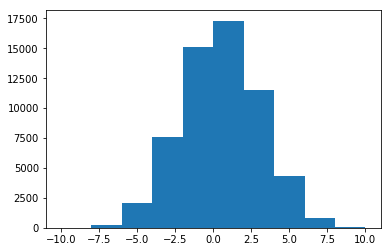

In [91]:
plt.hist(a.sum(axis=1))

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from scipy import stats
import seaborn as sns

from matplotlib import rcParams
from pymc3 import Exponential, StudentT, Deterministic, Uniform, Lognormal

In [122]:
#factors = np.array([1,1,1,1,1,1,1,1,1,1])
factors = np.array([0,0,0,0,0,0,0,0,0,0])
#factors = np.array([-1,-1,-1,-1,-1,1,1,1,1,1])

In [123]:
with pm.Model() as model:
    mean = pm.Uniform('mean', lower=-1, upper=1)
    #volatility = pm.Gamma('vol', mu=1, sd=1)
    obs = pm.Normal('obs', mu=mean, observed=factors)

In [124]:
with model:
    step = pm.NUTS()
    trace = pm.sample(5000, step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mean]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:03<00:00, 6744.68draws/s]
The acceptance probability does not match the target. It is 0.6936980302549535, but should be close to 0.8. Try to increase the number of tuning steps.


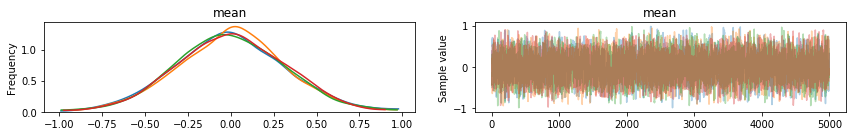

In [125]:
pm.traceplot(trace);

In [179]:
# Euro problem from Think Bayes

In [220]:
# P(data | hypothesis)
# So if the data says "H", and the hypothesis is that the prob is 54, the prob of H is 54/100
def lik(data, hypo):
    x = hypo
    if data == "H":
        return x/100.0
    else:
        return 1 - x/100.0

In [221]:
lik('H', 50)

0.5

In [222]:
hypos = np.linspace(0, 100, 101)

In [223]:
prior = np.repeat(1/101, 101)
prior_start = prior

In [233]:
dataset = 'HH' #'H'*140 + 'T'*110
dataset = 'H'*140 + 'T'*110

In [234]:
dataset

'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT'

In [235]:
likelihood = np.zeros_like(prior)

In [236]:
hypos

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [242]:
for data in dataset:
    likelihood = np.zeros_like(prior)
    for i, hypo in enumerate(hypos):
        likelihood[i] = lik(data, hypo)
        #print("%d: %f, %f" % (i, hypo, likelihood[i]))
    numerator = prior*likelihood
    posterior = numerator/numerator.sum()
    prior = posterior

In [238]:
likelihood

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

In [239]:
prior

array([0.00000000e+000, 4.00052965e-211, 7.30085627e-169, 2.38976407e-144,
       4.21308762e-127, 7.68392798e-114, 4.20520855e-103, 4.16190451e-094,
       2.17613207e-086, 1.20015015e-079, 1.11923717e-073, 2.47120123e-068,
       1.65606342e-063, 4.06742828e-059, 4.23893533e-055, 2.10516772e-051,
       5.47022377e-048, 8.02755122e-045, 7.08705128e-042, 3.96834572e-039,
       1.47368289e-036, 3.77021383e-034, 6.86551406e-032, 9.15331844e-030,
       9.15666999e-028, 7.02208841e-026, 4.20678843e-024, 2.00177477e-022,
       7.67823052e-021, 2.40536036e-019, 6.22656692e-018, 1.34588079e-016,
       2.45201661e-015, 3.79711585e-014, 5.03599416e-013, 5.75940497e-012,
       5.71476446e-011, 4.94710748e-010, 3.75493698e-009, 2.51016423e-008,
       1.48389236e-007, 7.78529410e-007, 3.63684353e-006, 1.51705353e-005,
       5.66512008e-005, 1.89809912e-004, 5.71704707e-004, 1.55055641e-003,
       3.79201106e-003, 8.37160682e-003, 1.66988737e-002, 3.01147940e-002,
       4.91198459e-002, 7

In [240]:
posterior.sum()

1.0

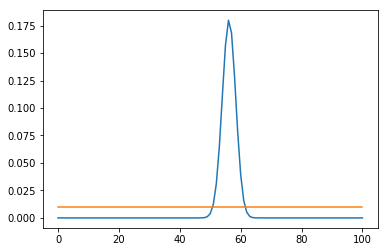

In [243]:
plt.plot(posterior)
plt.plot(prior_start)